**Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.**

###Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
from datetime import datetime,time
# upsample to daily intervals
from pandas import read_excel
from matplotlib import pyplot 

###Import Data collection and description

<Axes: xlabel='Quarter'>

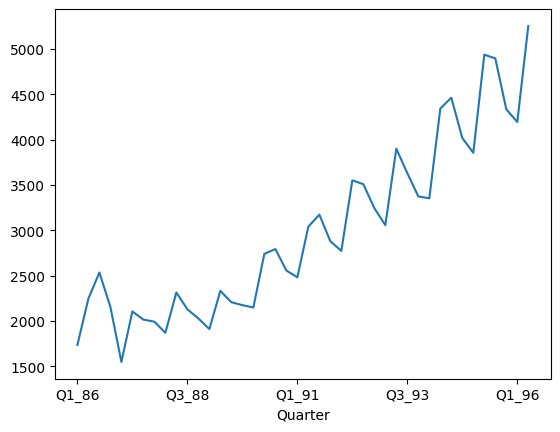

In [ ]:
coca_raw = pd.read_excel('CocaCola_Sales_Rawdata (1).xlsx', header=0, index_col=0,parse_dates=True)
coca_raw.Sales.plot() 

In [ ]:
coca_raw.head() 

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [ ]:
coca_raw.Sales

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

In [ ]:
import pandas as pd

coca_raw = pd.read_excel('CocaCola_Sales_Rawdata (1).xlsx', header=0)
coca_raw['Quarter'] = coca_raw['Quarter'].astype(str)

coca_raw = coca_raw[['Quarter', 'Sales']]
print(coca_raw)

   Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_95  4333.000000
40   Q1_96  4194

In [ ]:
# Extract the year and quarter from the "Quarter" column
coca_raw["Year"] = coca_raw["Quarter"].str.split("_").str[1]
coca_raw["Quarter"] = coca_raw["Quarter"].str.split("_").str[0]

# Map quarter to month
quarter_to_month = {"Q1": "Mar", "Q2": "Jun", "Q3": "Sept", "Q4": "Dec"}
coca_raw["Month"] = coca_raw["Quarter"].map(quarter_to_month)

# Create the "Date" column by combining the year and quarter
coca_raw["Date"] = pd.to_datetime(coca_raw["Year"] + coca_raw["Quarter"], format="%yQ%m")

# Display the updated DataFrame
print(coca_raw)

   Quarter        Sales Year Month       Date
0       Q1  1734.827000   86   Mar 1986-01-01
1       Q2  2244.960999   86   Jun 1986-02-01
2       Q3  2533.804993   86  Sept 1986-03-01
3       Q4  2154.962997   86   Dec 1986-04-01
4       Q1  1547.818996   87   Mar 1987-01-01
5       Q2  2104.411995   87   Jun 1987-02-01
6       Q3  2014.362999   87  Sept 1987-03-01
7       Q4  1991.746998   87   Dec 1987-04-01
8       Q1  1869.049999   88   Mar 1988-01-01
9       Q2  2313.631996   88   Jun 1988-02-01
10      Q3  2128.320000   88  Sept 1988-03-01
11      Q4  2026.828999   88   Dec 1988-04-01
12      Q1  1910.603996   89   Mar 1989-01-01
13      Q2  2331.164993   89   Jun 1989-02-01
14      Q3  2206.549995   89  Sept 1989-03-01
15      Q4  2173.967995   89   Dec 1989-04-01
16      Q1  2148.278000   90   Mar 1990-01-01
17      Q2  2739.307999   90   Jun 1990-02-01
18      Q3  2792.753998   90  Sept 1990-03-01
19      Q4  2556.009995   90   Dec 1990-04-01
20      Q1  2480.973999   91   Mar

In [ ]:
duplicate = pd.DataFrame(pd.get_dummies(coca_raw['Quarter']))
coc_raw = pd.concat((coca_raw, duplicate), axis=1)
# Drop the "Year" and "Quarter" columns
coc_raw.drop(["Year", "Month"], axis=1, inplace=True)
coc_raw.head()

,Quarter,Sales,Date,Q1,Q2,Q3,Q4
0,Q1,1734.827000,1986-01-01,1,0,0,0
1,Q2,2244.960999,1986-02-01,0,1,0,0
2,Q3,2533.804993,1986-03-01,0,0,1,0
3,Q4,2154.962997,1986-04-01,0,0,0,1
4,Q1,1547.818996,1987-01-01,1,0,0,0


In [ ]:
# Add time index "t" column
coc_raw["t"] = np.arange(len(coc_raw))

# Add squared time index "t_square" column
coc_raw["t_square"] = coc_raw["t"] ** 2

# Add t_logarithm column for the "Sales" values
coc_raw["Log_Sales"] = np.log(coc_raw["Sales"])

print(coc_raw)

   Quarter        Sales       Date  Q1  Q2  Q3  Q4   t  t_square  Log_Sales
0       Q1  1734.827000 1986-01-01   1   0   0   0   0         0   7.458663
1       Q2  2244.960999 1986-02-01   0   1   0   0   1         1   7.716443
2       Q3  2533.804993 1986-03-01   0   0   1   0   2         4   7.837477
3       Q4  2154.962997 1986-04-01   0   0   0   1   3         9   7.675529
4       Q1  1547.818996 1987-01-01   1   0   0   0   4        16   7.344602
5       Q2  2104.411995 1987-02-01   0   1   0   0   5        25   7.651791
6       Q3  2014.362999 1987-03-01   0   0   1   0   6        36   7.608058
7       Q4  1991.746998 1987-04-01   0   0   0   1   7        49   7.596767
8       Q1  1869.049999 1988-01-01   1   0   0   0   8        64   7.533186
9       Q2  2313.631996 1988-02-01   0   1   0   0   9        81   7.746574
10      Q3  2128.320000 1988-03-01   0   0   1   0  10       100   7.663088
11      Q4  2026.828999 1988-04-01   0   0   0   1  11       121   7.614228
12      Q1  

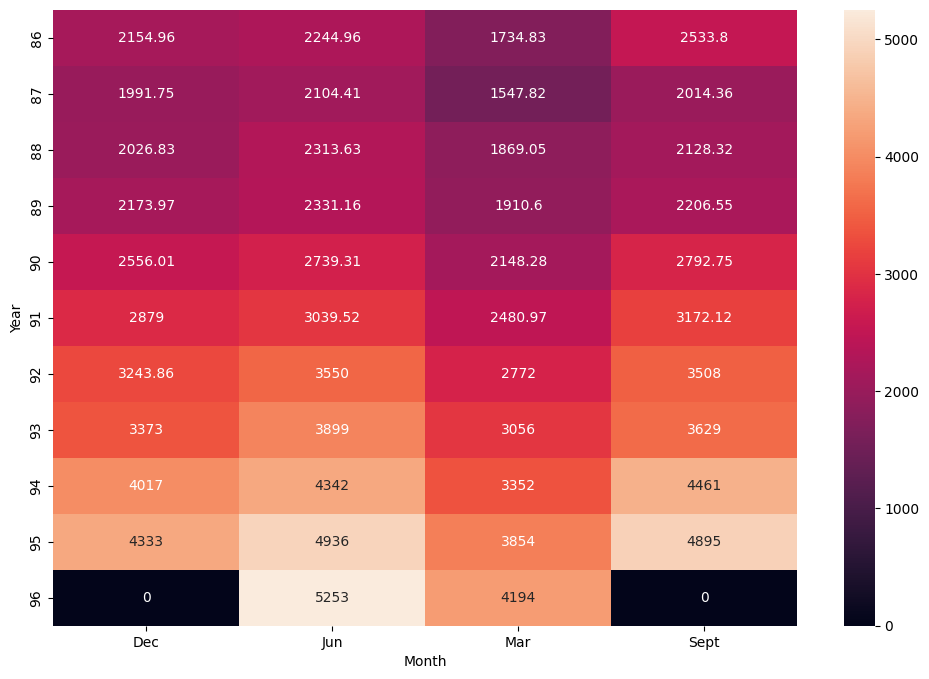

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=coca_raw, values="Sales", index="Year", columns="Month", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt="g")
plt.show()

<Axes: xlabel='Month', ylabel='Sales'>

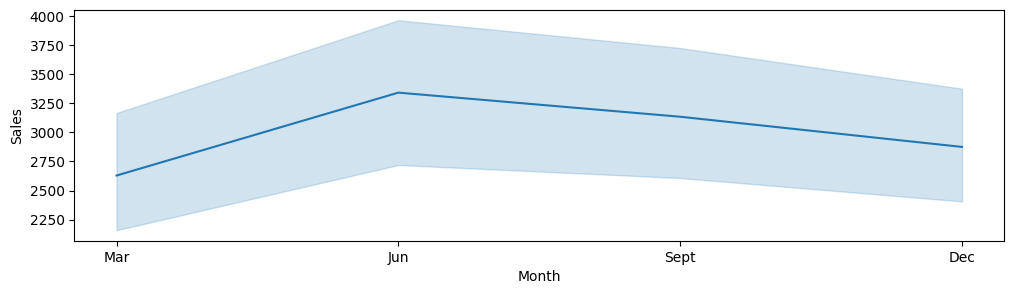

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Sales",data=coca_raw) 

<Axes: xlabel='Year', ylabel='Sales'>

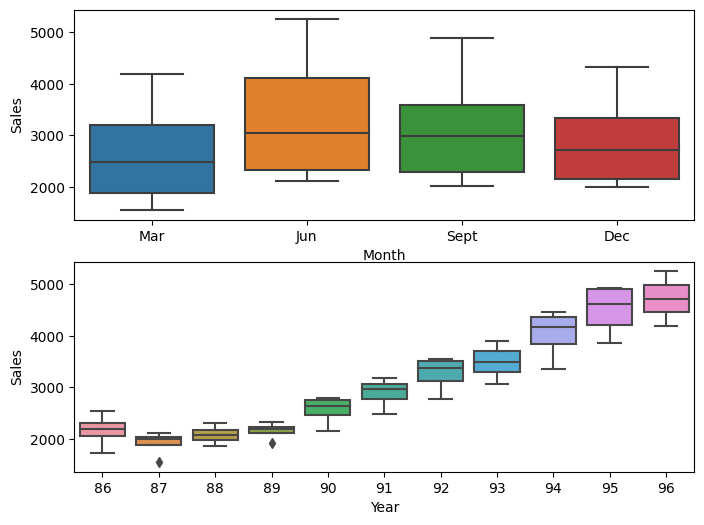

In [ ]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Month",y="Sales",data=coca_raw)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=coca_raw)

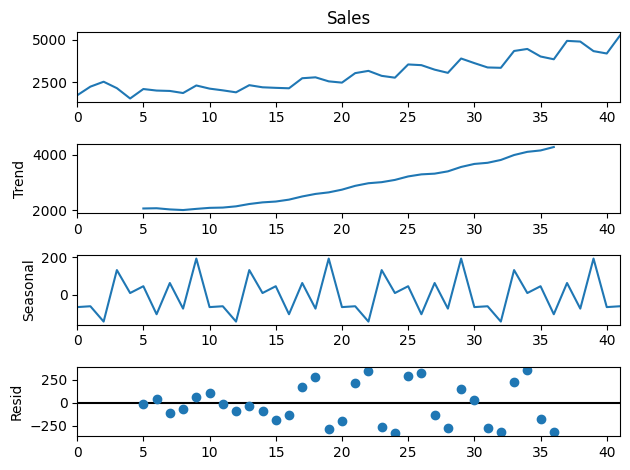

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(coc_raw.Sales,period=10)
decompose_ts_add.plot()
plt.show() 

#### Splitting data

In [ ]:
Train = coc_raw.head(33)
Test = coc_raw.tail(10)  

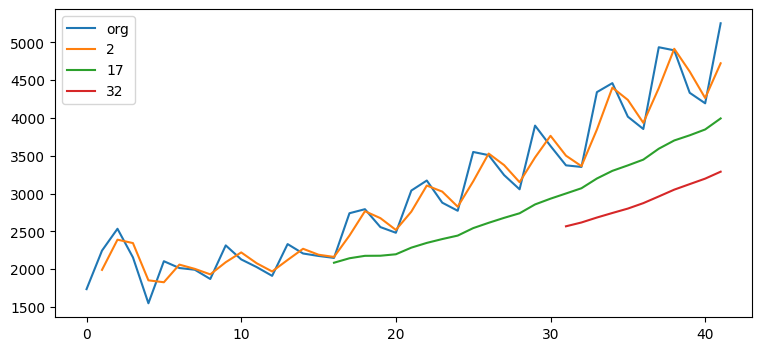

In [ ]:
#Moving Average 
plt.figure(figsize=(9,4))
coc_raw.Sales.plot(label="org")
for i in range(2,40,15):
    coc_raw["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


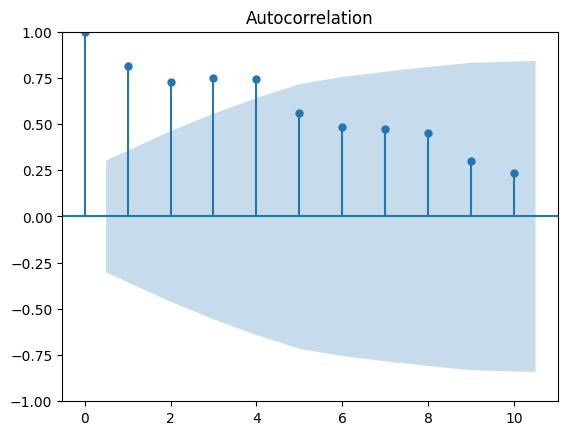

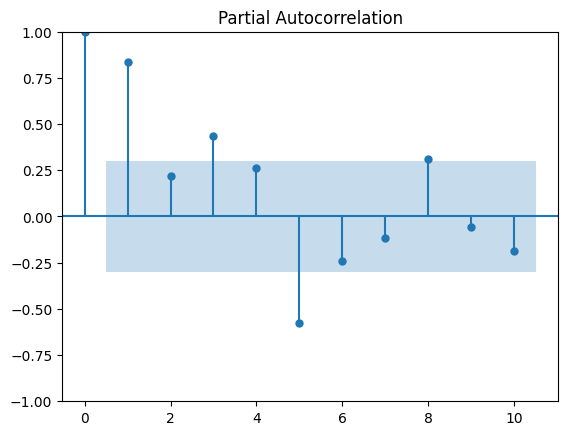

In [ ]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coc_raw.Sales,lags=10)
tsa_plots.plot_pacf(coc_raw.Sales,lags=10)
plt.show() 

In [ ]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

770.6165171445208

In [ ]:
#Exponential

Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Log_Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

3917.7570224700385

In [ ]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

422.2522528046535

In [ ]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

1817.827313506877

In [ ]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

221.18564692343438

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Log_Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

2523.9372173304378

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('Log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Log_Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

3982.8130651880297